In [1]:
import numpy as np
import pandas as pd
import io

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files

In [3]:
uploaded = files.upload()

Saving dataset_group.csv to dataset_group.csv


In [4]:
data = pd.read_csv(io.BytesIO(uploaded[next(iter(uploaded))]))

In [5]:
data.head()

,Date,Order_id,Product
0,01/01/18,1,yogurt
1,01/01/18,1,pork
2,01/01/18,1,sandwich bags
3,01/01/18,1,lunch meat
4,01/01/18,1,all- purpose


In [6]:
print("There are", data.shape[0], 'rows and', data.shape[1], "columns.")

There are 20641 rows and 3 columns.


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20641 entries, 0 to 20640
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      20641 non-null  object
 1   Order_id  20641 non-null  int64 
 2   Product   20641 non-null  object
dtypes: int64(1), object(2)
memory usage: 483.9+ KB


In [8]:
data.isnull().sum()

,0
Date,0
Order_id,0
Product,0


# **Summary Statistics**

In [21]:
print("\n📊 Summary Statistics:\n")
data.describe(include='all')


📊 Summary Statistics:



,Date,Order_id,Product
count,20641,20641.000000,20641
unique,603,NaN,37
top,08/02/19,NaN,poultry
freq,183,NaN,640
mean,NaN,575.986289,NaN
std,NaN,328.557078,NaN
min,NaN,1.000000,NaN
25%,NaN,292.000000,NaN
50%,NaN,581.000000,NaN
75%,NaN,862.000000,NaN


In [22]:
print("\n🔢 Unique Value Counts:\n")
for col in data.columns:
    print(f"{col}: {data[col].nunique()} unique values")


🔢 Unique Value Counts:

Date: 603 unique values
Order_id: 1139 unique values
Product: 37 unique values


# **Univariate Analysis**

<ipython-input-15-1934247588>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_counts.values, y=product_counts.index, palette='viridis')


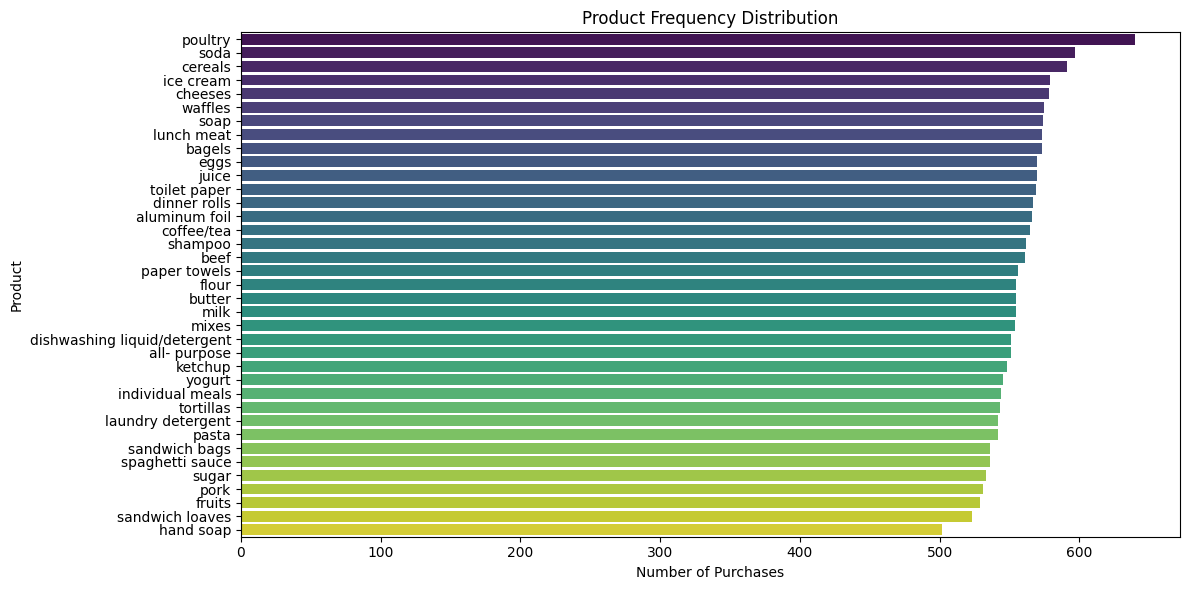

In [15]:
# Product frequency distribution
product_counts = data['Product'].value_counts().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=product_counts.values, y=product_counts.index, palette='viridis')
plt.title('Product Frequency Distribution')
plt.xlabel('Number of Purchases')
plt.ylabel('Product')
plt.tight_layout()
plt.show()

# **Bivariate Analysis**

<ipython-input-23-3568985201>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'])


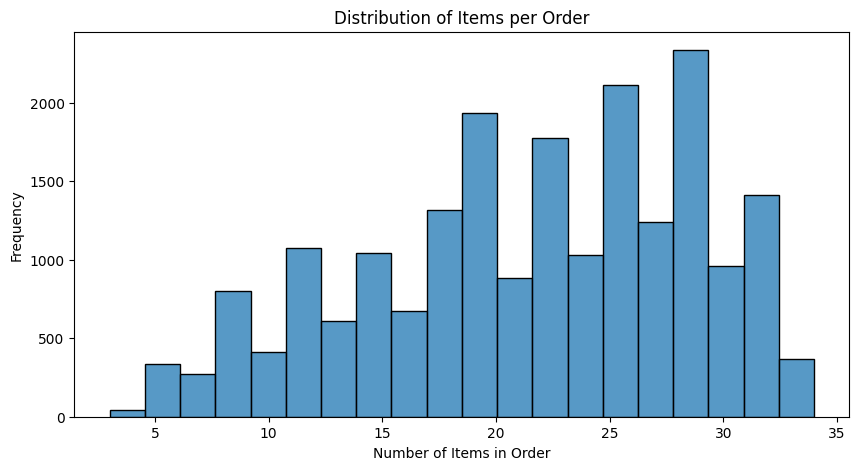

In [23]:
# Convert 'Date' to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Add derived column: number of products per order
order_product_counts = data.groupby('Order_id')['Product'].count().reset_index(name='Items_Per_Order')

# Merge back to original dataframe
df = data.merge(order_product_counts, on='Order_id')

# -----------------------------
# 1. Products per order
# -----------------------------
plt.figure(figsize=(10, 5))
sns.histplot(df['Items_Per_Order'], bins=20, kde=False)
plt.title('Distribution of Items per Order')
plt.xlabel('Number of Items in Order')
plt.ylabel('Frequency')
plt.show()

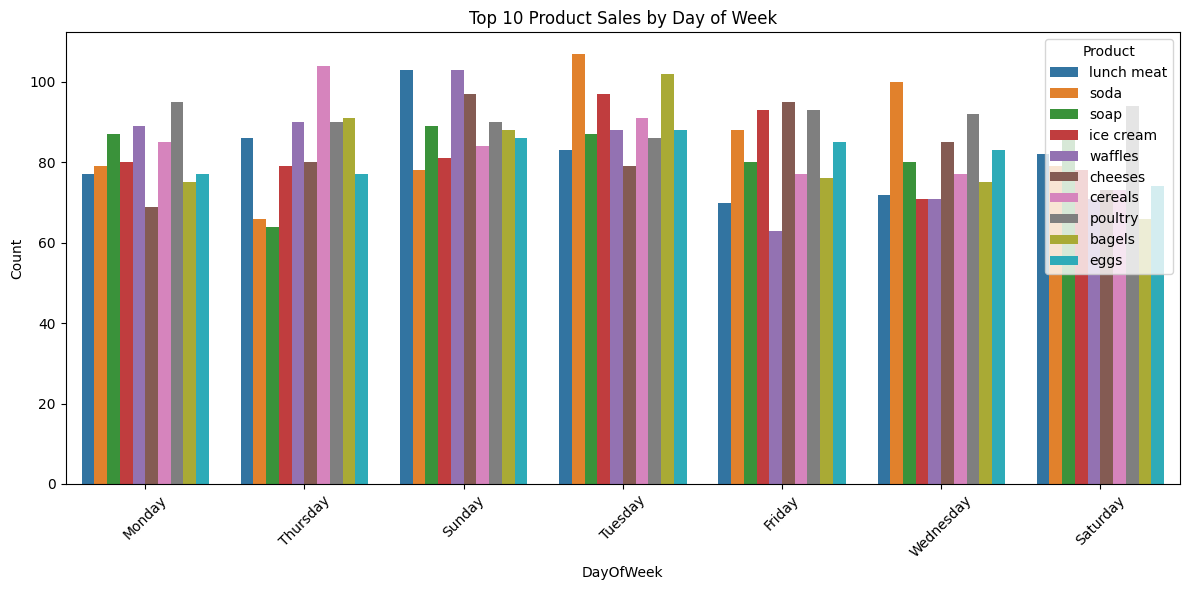

In [24]:
# -----------------------------
# 2. Top 10 Product Frequency by Day of Week
# -----------------------------
df['DayOfWeek'] = df['Date'].dt.day_name()

top_10_products = df['Product'].value_counts().head(10).index
filtered_df = df[df['Product'].isin(top_10_products)]

plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_df, x='DayOfWeek', hue='Product')
plt.title('Top 10 Product Sales by Day of Week')
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.tight_layout()
plt.show()

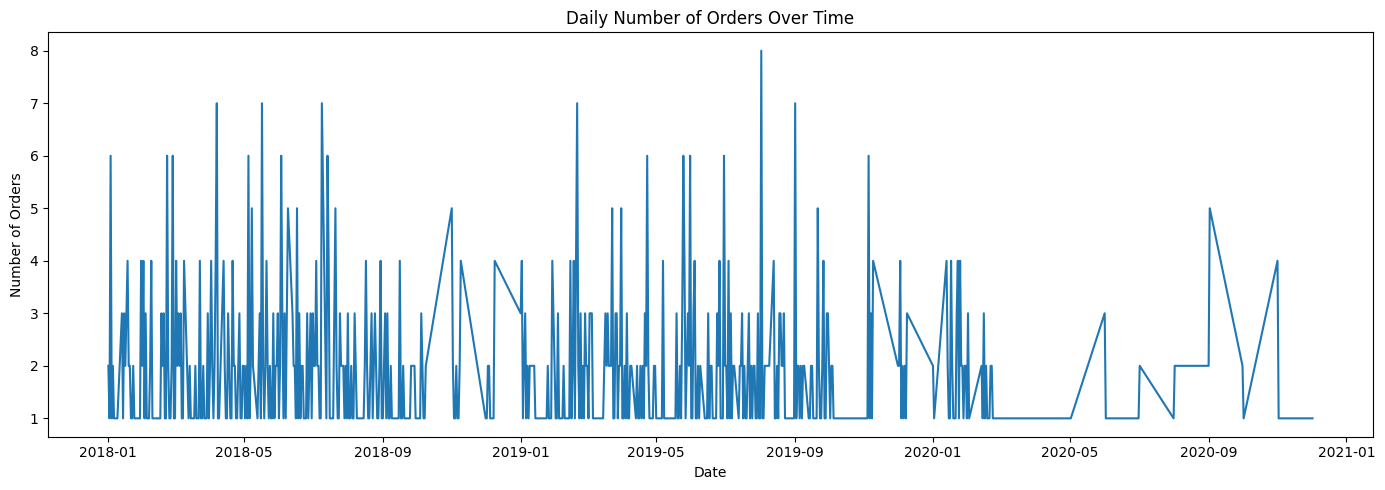

In [25]:
# -----------------------------
# 3. Number of Orders per Day (Trend)
# -----------------------------
daily_orders = df.groupby('Date')['Order_id'].nunique().reset_index(name='Orders')

plt.figure(figsize=(14, 5))
sns.lineplot(data=daily_orders, x='Date', y='Orders')
plt.title('Daily Number of Orders Over Time')
plt.ylabel('Number of Orders')
plt.xlabel('Date')
plt.tight_layout()
plt.show()

🔍 What These Plots Show:
📦 Items per Order: How large are typical baskets?

📅 Product Sales by Weekday: Which days are certain items most popular?

📈 Order Volume Over Time: Identifies trends, seasonality, or anomalies.

# **Multivariate Analysis**

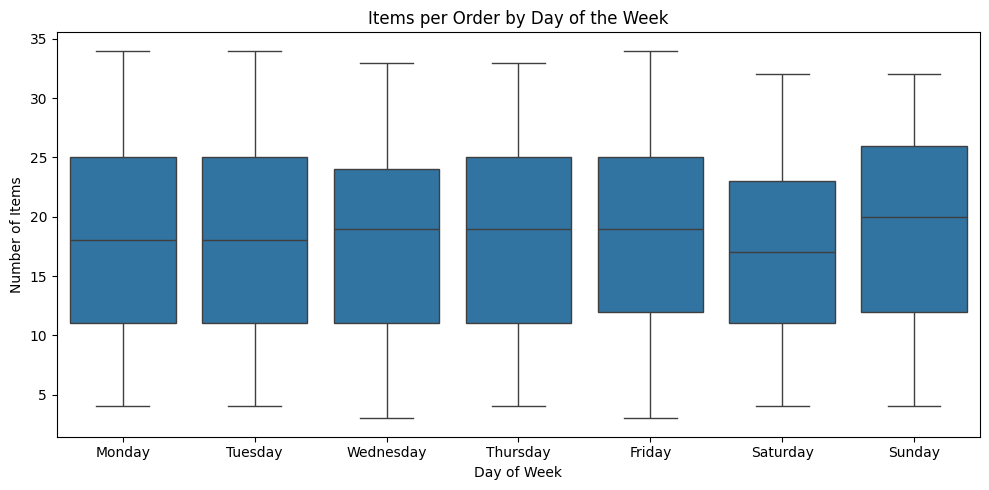

In [29]:
df['Date'] = pd.to_datetime(df['Date'])
df['DayOfWeek'] = df['Date'].dt.day_name()

# Items per Order
items_per_order = df.groupby('Order_id').agg({
    'Product': 'count',
    'Date': 'first',
}).reset_index().rename(columns={'Product': 'Items_Per_Order'})
items_per_order['DayOfWeek'] = items_per_order['Date'].dt.day_name()

# -----------------------------
# 1. Items per Order by Day of Week
# -----------------------------
plt.figure(figsize=(10, 5))
sns.boxplot(data=items_per_order, x='DayOfWeek', y='Items_Per_Order', order=[
            'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Items per Order by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Items')
plt.tight_layout()
plt.show()


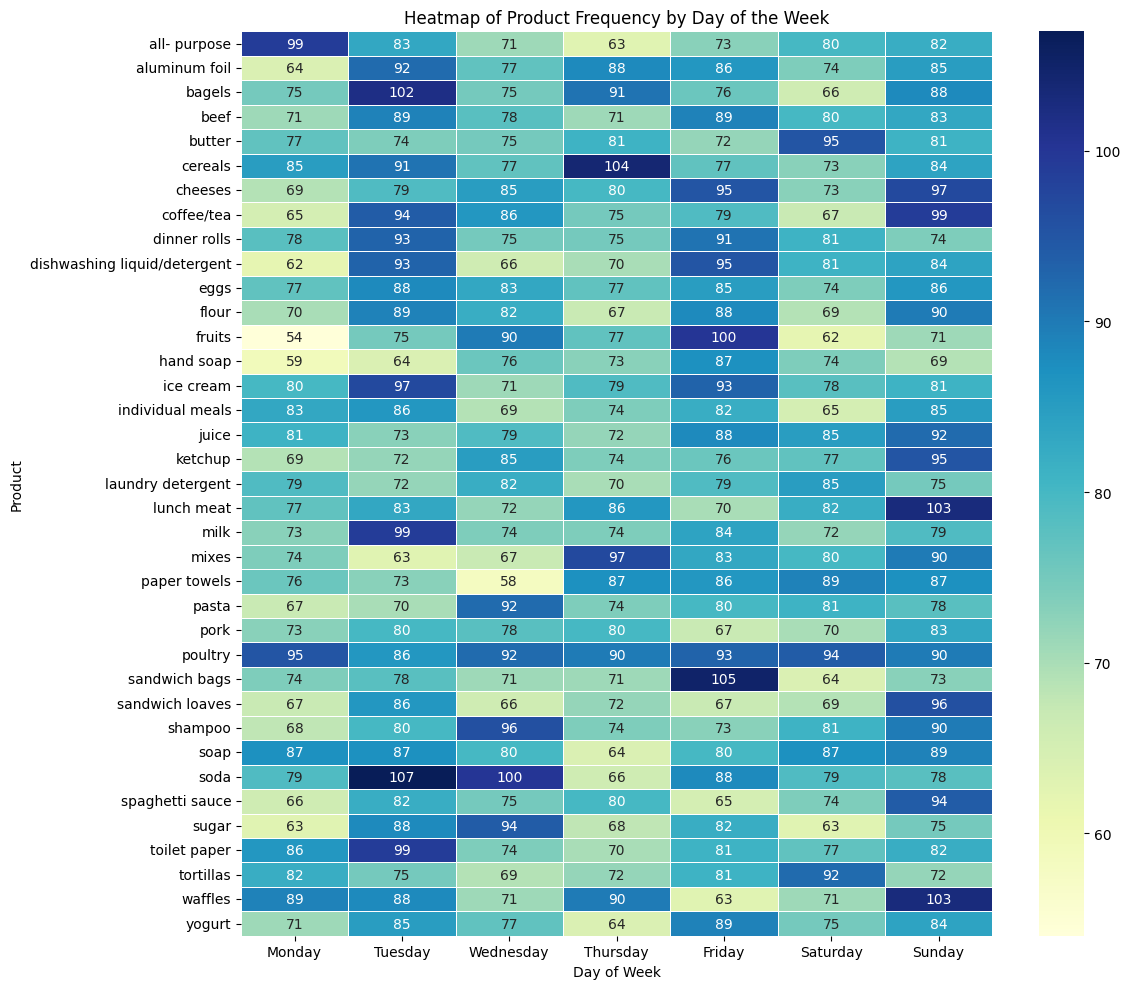

In [27]:
# -----------------------------
# 2. Heatmap: Product Frequency by Day of Week
# -----------------------------
pivot_table = df.pivot_table(index='Product', columns='DayOfWeek', aggfunc='size', fill_value=0)
pivot_table = pivot_table[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]

plt.figure(figsize=(12, 10))
sns.heatmap(pivot_table, cmap="YlGnBu", linewidths=0.5, annot=True, fmt='d')
plt.title('Heatmap of Product Frequency by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Product')
plt.tight_layout()
plt.show()


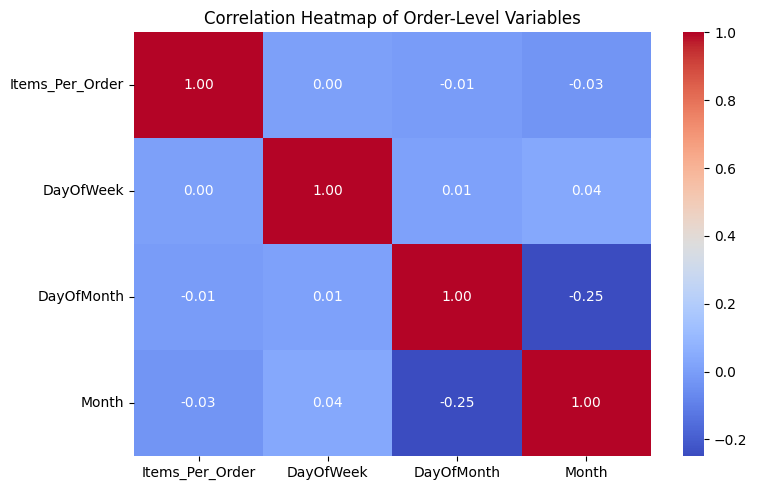

In [28]:

# -----------------------------
# 3. Correlation Matrix (Order-level features)
# -----------------------------
# Feature Engineering: total products per order and unique days
order_summary = df.groupby('Order_id').agg({
    'Product': 'count',
    'Date': 'min'
}).rename(columns={'Product': 'Items_Per_Order'}).reset_index()

order_summary['DayOfWeek'] = order_summary['Date'].dt.dayofweek  # 0=Monday
order_summary['DayOfMonth'] = order_summary['Date'].dt.day
order_summary['Month'] = order_summary['Date'].dt.month

# Correlation plot
plt.figure(figsize=(8, 5))
sns.heatmap(order_summary[['Items_Per_Order', 'DayOfWeek', 'DayOfMonth', 'Month']].corr(),
            annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Order-Level Variables")
plt.tight_layout()
plt.show()

Key Insights from This Code:
Box Plot: Shows which weekdays have higher or lower average basket sizes.

Heatmap: Highlights which products sell more on which days.

Correlation Matrix: Useful to detect whether certain time features (day/month) affect order size.